In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# Read and check the data
cancer = pd.read_csv('../Resources/data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Clean data
cancer = cancer.iloc[:,:-1]
cancer = cancer.drop(cancer.columns[[0]], axis=1) 
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Ref: 21-2-6
# Data Pre Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical
target = cancer["diagnosis"]
data = cancer.drop("diagnosis", axis=1)
feature_names = data.columns
data.head()

Using TensorFlow backend.


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

# Deep Learning Methodology_#Relu¶

In [6]:
X = cancer.drop("diagnosis", axis=1)
y = cancer["diagnosis"]
print(X.shape, y.shape)

(569, 30) (569,)


In [7]:
# Create a Deep Learning Model
from keras.models import Sequential
from keras.layers import Dense

In [8]:
# Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1, stratify=y)
X_scaler = StandardScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

# Step 2: Convert encoded labels to one-hot-encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [9]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='relu', input_dim=30))
model.add(Dense(units=50, activation='relu'))
model.add(Dense(units=2, activation='softmax'))

In [10]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
clf_4 = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=2
)

Epoch 1/60
 - 0s - loss: 0.5222 - acc: 0.7911
Epoch 2/60
 - 0s - loss: 0.2416 - acc: 0.9648
Epoch 3/60
 - 0s - loss: 0.1477 - acc: 0.9695
Epoch 4/60
 - 0s - loss: 0.1084 - acc: 0.9742
Epoch 5/60
 - 0s - loss: 0.0878 - acc: 0.9742
Epoch 6/60
 - 0s - loss: 0.0756 - acc: 0.9789
Epoch 7/60
 - 0s - loss: 0.0671 - acc: 0.9789
Epoch 8/60
 - 0s - loss: 0.0606 - acc: 0.9836
Epoch 9/60
 - 0s - loss: 0.0550 - acc: 0.9836
Epoch 10/60
 - 0s - loss: 0.0501 - acc: 0.9906
Epoch 11/60
 - 0s - loss: 0.0461 - acc: 0.9930
Epoch 12/60
 - 0s - loss: 0.0430 - acc: 0.9930
Epoch 13/60
 - 0s - loss: 0.0398 - acc: 0.9930
Epoch 14/60
 - 0s - loss: 0.0366 - acc: 0.9930
Epoch 15/60
 - 0s - loss: 0.0345 - acc: 0.9930
Epoch 16/60
 - 0s - loss: 0.0322 - acc: 0.9930
Epoch 17/60
 - 0s - loss: 0.0300 - acc: 0.9953
Epoch 18/60
 - 0s - loss: 0.0282 - acc: 0.9953
Epoch 19/60
 - 0s - loss: 0.0271 - acc: 0.9953
Epoch 20/60
 - 0s - loss: 0.0251 - acc: 0.9953
Epoch 21/60
 - 0s - loss: 0.0232 - acc: 0.9953
Epoch 22/60
 - 0s - lo

In [11]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.10874153879866263, Accuracy: 0.972027972027972


# Deep Learning Methodology_#Sigmoid

In [12]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='sigmoid', input_dim=30))
model.add(Dense(units=50, activation='sigmoid'))
model.add(Dense(units=2, activation='softmax'))

In [13]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
clf_5 = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 688us/step - loss: 0.7329 - acc: 0.4836
Epoch 2/60
426/426 [==============================] - 0s 82us/step - loss: 0.6136 - acc: 0.6268
Epoch 3/60
426/426 [==============================] - 0s 83us/step - loss: 0.5383 - acc: 0.7136
Epoch 4/60
426/426 [==============================] - 0s 76us/step - loss: 0.4650 - acc: 0.8545
Epoch 5/60
426/426 [==============================] - 0s 79us/step - loss: 0.3938 - acc: 0.9014
Epoch 6/60
426/426 [==============================] - 0s 83us/step - loss: 0.3275 - acc: 0.9249
Epoch 7/60
426/426 [==============================] - 0s 69us/step - loss: 0.2710 - acc: 0.9343
Epoch 8/60
426/426 [==============================] - 0s 71us/step - loss: 0.2265 - acc: 0.9390
Epoch 9/60
426/426 [==============================] - 0s 77us/step - loss: 0.1912 - acc: 0.9390
Epoch 10/60
426/426 [==============================] - 0s 67us/step - loss: 0.1646 - acc: 0.9531
Epoch 11/60
426/426 [=================

In [14]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.07900982731595062, Accuracy: 0.972027972027972


# Deep Learning Methodology_#Linear¶

In [15]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='linear', input_dim=30))
model.add(Dense(units=50, activation='linear'))
model.add(Dense(units=2, activation='softmax'))

In [16]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
clf_6 = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=0
)

In [17]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.17234523296721527, Accuracy: 0.958041958041958


# Deep Learning Methodology_#Tanh

In [18]:
# Create model and add layers
model = Sequential()
model.add(Dense(units=50, activation='tanh', input_dim=30))
model.add(Dense(units=50, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

In [19]:
# Compile and fit the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
clf_7 = model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=60,
    shuffle=True,
    verbose=1
)

Epoch 1/60
426/426 [==============================] - 0s 845us/step - loss: 0.3383 - acc: 0.8803
Epoch 2/60
426/426 [==============================] - 0s 82us/step - loss: 0.1422 - acc: 0.9484
Epoch 3/60
426/426 [==============================] - 0s 81us/step - loss: 0.0952 - acc: 0.9789
Epoch 4/60
426/426 [==============================] - 0s 88us/step - loss: 0.0780 - acc: 0.9836
Epoch 5/60
426/426 [==============================] - 0s 76us/step - loss: 0.0693 - acc: 0.9836
Epoch 6/60
426/426 [==============================] - 0s 102us/step - loss: 0.0630 - acc: 0.9883
Epoch 7/60
426/426 [==============================] - 0s 104us/step - loss: 0.0587 - acc: 0.9906
Epoch 8/60
426/426 [==============================] - 0s 82us/step - loss: 0.0552 - acc: 0.9906
Epoch 9/60
426/426 [==============================] - 0s 91us/step - loss: 0.0533 - acc: 0.9906
Epoch 10/60
426/426 [==============================] - 0s 102us/step - loss: 0.0509 - acc: 0.9906
Epoch 11/60
426/426 [==============

In [20]:
# Quantify our Trained Model
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test_categorical, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

Normal Neural Network - Loss: 0.10728431530001185, Accuracy: 0.972027972027972


# Visualization Neural Network

In [21]:
loss_hist_relu = clf_4.history['loss'] 
acc_hist_relu = clf_4.history['acc'] 
loss_hist_sigmoid = clf_5.history['loss'] 
acc_hist_sigmoid = clf_5.history['acc'] 
loss_hist_linear = clf_6.history['loss'] 
acc_hist_linear = clf_6.history['acc'] 
loss_hist_tanh = clf_6.history['loss'] 
acc_hist_tanh = clf_6.history['acc'] 

In [22]:
x_axis = list(range(1, 61))

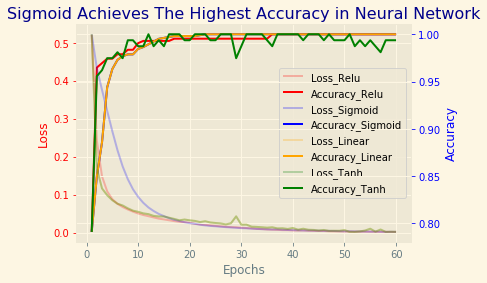

In [23]:
import matplotlib.pyplot as plt

plt.style.use('Solarize_Light2')
plt.figure(figsize = (6,4))
fig, ax1 = plt.subplots()
plt.xlabel("Epochs")
plt.ylabel("Loss & Accuracy")
lns1= ax1.plot(x_axis, loss_hist_relu, "r-", label="Loss_Relu", alpha= 0.25)
ax2 = ax1.twinx()
lns2= ax2.plot(x_axis, acc_hist_relu, "r-", label="Accuracy_Relu", alpha= 1)
ax1.set_ylabel("Loss", color="red")
ax2.set_ylabel("Accuracy", color="blue")
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')


ax3 = ax1.twinx()
lns3= ax3.plot(x_axis, loss_hist_sigmoid, "blue", label="Loss_Sigmoid", alpha= 0.25)
# ax3.tick_params(axis='y', colors='white')
ax3.axis('off')

ax4 = ax1.twinx()
lns4= ax4.plot(x_axis, acc_hist_sigmoid,"blue", label="Accuracy_Sigmoid", alpha= 1)
ax4.axis('off')
ax5 = ax1.twinx()
lns5= ax5.plot(x_axis, loss_hist_linear, "orange", label="Loss_Linear", alpha= 0.25)
ax5.axis('off')

ax6 = ax1.twinx()
lns6= ax6.plot(x_axis, acc_hist_sigmoid,"orange", label="Accuracy_Linear", alpha= 1)
ax6.axis('off')

ax7 = ax1.twinx()
lns7= ax7.plot(x_axis, loss_hist_tanh, "green", label="Loss_Tanh", alpha= 0.25)
ax7.axis('off')

ax8 = ax1.twinx()
lns8= ax8.plot(x_axis, acc_hist_tanh,"green", label="Accuracy_Tanh", alpha= 1)
ax8.axis('off')


plt.title("Sigmoid Achieves The Highest Accuracy in Neural Network", color = "darkblue")

# added these three lines for all legends in one box 
lns = lns1+lns2+lns3+lns4+lns5+lns6+lns7+lns8
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc='center right')

plt.savefig('Neural_Network.png')
plt.show()